# Работа 1.4. Исследование вынужденной прецессии гироскопа.

**Цель работы:** исследовать вынужденную прецессию уравновешенного симметричного гироскопа; установить зависимость угловой скорости вынужденной прецессии от величины момента сил, действующих на ось гироскопа; по угловой скорости прецессии определить угловую скорость вращения ротора гироскопа.

**В работе используются:** гироскоп в кардановом подвесе, секундомер, набор грузов, отдельный ротор гироскопа, цилиндр известной массы, крутильный маятник, штангенциркуль, линейка.
$\newcommand\diff[2]{\frac{d{#1}}{d{#2}}}$
$\newcommand\sqrdiff[2]{\left|\diff{#1}{#2}\right|^2}$
$\newcommand\err[1]{\sigma^2_{#1}}$
$\newcommand\ferr[2]{\diff{#1}{#2} \err{#2}}$

## Теория

$\vec{P} = \sum_{i} m_i \vec{v_i}$

$\diff{\vec{P}}{t} = \sum_{i} \vec{F_i}$

$\vec{L} = \sum_{i} m_i \left[ \vec{r_i} \times \vec{v_i} \right]$

$\vec{F_{ij}} = -\vec{F_{ji}}$

$\diff{\vec{L}}{t} = \sum_i m_i \left[ \vec{r_i} \times \diff{v_i}{t} \right] =
\sum_{i, j} \left[ \vec{r_i} \times \vec{F_{ij}} \right] =
\sum_{i, j} \left[ \left(\vec{r_i} - \vec{r_j} \right) \times \vec{F_{ij}} \right] =
0$

$\diff{\vec{L}}{t} = \sum_{i} \left[ \vec{r_i} \times \vec{F_i} \right]$

$\diff{v}{t} = \frac{2 \pi v}{T} = \omega v$

$\frac{2\pi L}{T} = \diff{L}{t} = \omega L$

$T = 2 \pi \sqrt{\frac{J}{K}}$

$\left(\frac{T_1}{T_2}\right)^2 = \frac{J_1}{J_2}$

$f = 400 Гц$, $l = 10 см$, $r = 3 см$, $M = 400 г$, $m = 200 г$

$\omega = 2 \pi f \approx 2.5 кГц$

$J = \frac{Mr^2}{2}$

$L = J \omega = \frac{4 \cdot 10^2 \cdot 9}{2} \cdot 2.5 \cdot 10^3 = 0.45 \cdot 10^7$

$\frac{2 \pi}{T} = \Omega = \frac{2 \cdot 10^3}{0.45 \cdot 10^7} = 4 \cdot 10^{-4}$

$T = \frac{6.3}{4 \cdot 10^{-4}} = 1.6 \cdot 10^4$

## Практика

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$I = m r^2$

$\sigma_{I} = \sqrt{r^4 \err{m} + (2 m r)^2 \err{r}}$

$m_ц = 1618.9 \pm 0.5 г$

$r_ц = 38.5 \pm 0.5 мм$

$I_ц = 2.40 \pm 0.06 г \cdot м^2$

In [7]:
def inertia_moment(m, r):
    return m * r ** 2

def inertia_moment_err(m, m_err, r, r_err):
    return np.sqrt(r ** 4 * m_err ** 2 + (2 * m * r) ** 2 * r_err ** 2)

In [16]:
m, m_err = 1618.9, 0.5
r, r_err = 0.0385, 0.0005
I, I_err = inertia_moment(m, r), inertia_moment_err(m, m_err, r, r_err)
print("I_ц = {} \pm {}".format(I, I_err))

I_ц = 2.399614525 \pm 0.06233205612514419


In [18]:
table_0 = pd.read_excel('Laba_1_4.xlsx', 0)
table_0.head(len(table_0))

,"$T_ц$, с","$T_р$, с"
0,4.81,4.19
1,4.50,3.81
2,4.82,3.60
3,4.72,3.50
4,4.81,3.56


$T = \frac{1}{n} \sum_{i=1}^n T_i$

$\sigma_{T} = \sqrt{\frac{1}{n(n-1)} \sum_{i=1}^n (T_i - T)^2}$

$T_ц = 4.73 \pm 0.06 с$

$T_0 = 3.7 \pm 0.1 с$

In [20]:
def period(T):
    return np.mean(T)

def period_err(T):
    return np.sqrt(np.var(T) / (len(T) - 1))

In [21]:
T_c_all = table_0.values[:, 0]
T_c, T_c_err = period(T_c_all), period_err(T_c_all)
T_r_all = table_0.values[:, 1]
T_r, T_r_err = period(T_r_all), period_err(T_r_all)
print("T_c = {} \pm {}".format(T_c, T_c_err))
print("T_r = {} \pm {}".format(T_r, T_r_err))

T_c = 4.731999999999999 \pm 0.060778285596090956
T_r = 3.732 \pm 0.12583322295800906


$I_0 = I_ц \frac{T^2_0}{T^2_ц}$

$\sigma_{I_0} =\sqrt{
\left(\frac{T_0}{T_ц}\right)^4 \err{I_ц} +
\left(\frac{2 I_ц T_0}{T^2_ц}\right)^2 \err{T_0}  + 
\left(\frac{2 I_ц T^2_0}{T^3_ц}\right)^2 \err{T_ц} 
}$

$I_0 = 1.5 \pm 0.1 г \cdot м^2$

In [24]:
def inertia_rt_moment(I_c, T_r, T_c):
    return I_c * (T_r / T_c) ** 2

def inertia_rt_moment_err(I_c, I_c_err, T_r, T_r_err, T_c, T_c_err):
    return np.sqrt(
        (T_r / T_c) ** 4 * I_c_err ** 2 +
        (2 * I_c * T_r / T_c ** 2) ** 2 * T_r_err ** 2 +
        (2 * I_c * T_r ** 2 / T_c ** 3) ** 2 * T_c_err ** 2
    )

In [25]:
I_r, I_r_err = inertia_rt_moment(I, T_r, T_c), inertia_rt_moment_err(I, I_err, T_r, T_r_err, T_c, T_c_err)
print("I_r = {} \pm {}".format(I_r, I_r_err))

I_r = 1.4925719660909986 \pm 0.11447232164766621


$\Omega = \frac{\alpha} {2 \pi t}$

$\sigma_{\Omega} =
\sqrt{\frac{\err{\alpha}}{(2 \pi t)^2} +
\left(\frac{\alpha} {2 \pi t^2} \right)^2 \err{t}}$

$L = m g r$

$\sigma_{L} = g \sqrt{ m^2 \err{r} + r^2 \err{m}}$

$r = 121 \pm 1 мм$

In [40]:
def precession(alpha, t):
    return alpha / (2 * np.pi * t)

def precession_err(alpha, alpha_err, t, t_err):
    return np.sqrt(
        (alpha_err / (2 * np.pi * t)) ** 2 +
        (alpha * t_err / (2 * np.pi * t ** 2)) ** 2 
    )

def torque(m, g, r):
    return m * g * r

def torque_err(m, m_err, g, r, r_err):
    return g * np.sqrt(
        (m * r_err) ** 2 +
        (r * m_err) ** 2)

In [60]:
table_1 = pd.read_excel('Laba_1_4.xlsx', 1)
g = 9.80665
r, r_err = 121, 1
m, m_err = 0.001 * table_1.values[:, 0] / 180 * np.pi, 0.001 * table_1.values[:, 1] / 180 * np.pi
alpha, alpha_err = table_1.values[:, 2] / 180 * np.pi, table_1.values[:, 3] / 180 * np.pi
t, t_err = table_1.values[:, 4], table_1.values[:, 5]
prec, prec_err = precession(alpha, t) * 1000, precession_err(alpha, alpha_err, t, t_err) * 1000
tor, tor_err = torque(m, g, r), torque_err(m, m_err, g, r, r_err)
table_1['$\Omega$, мГц'] = np.around(prec, decimals=1)
table_1['$\sigma_{\Omega}$, мГц'] = np.around(prec_err, decimals=1)
table_1['$L$, $Н \cdot мм$'] = np.around(tor, decimals=2)
table_1['$\sigma_L$, $Н \cdot мм$'] = np.around(tor_err, decimals=2)
table_1.head(len(table_1))

,"$m$, г","$\sigma_m$, г","$\alpha$, $^{\circ}$","$\sigma_{\alpha}$, $^{\circ}$","$t$, с","$\sigma_t$, с","$\Omega$, мГц","$\sigma_{\Omega}$, мГц","$L$, $Н \cdot мм$","$\sigma_L$, $Н \cdot мм$"
0,60,0.5,30,1,16.5,0.1,5.1,0.2,1.24,0.01
1,76,0.5,60,1,25.9,0.1,6.4,0.1,1.57,0.02
2,93,0.5,60,1,21.8,0.1,7.6,0.1,1.93,0.02
3,116,0.5,60,1,17.4,0.1,9.6,0.2,2.40,0.02
4,141,0.5,60,1,14.4,0.1,11.6,0.2,2.92,0.03
5,173,0.5,90,1,17.1,0.1,14.6,0.2,3.58,0.03
6,215,0.5,90,1,13.5,0.1,18.5,0.2,4.45,0.04
7,268,0.5,120,1,14.6,0.1,22.8,0.2,5.55,0.05
8,335,0.5,180,1,17.6,0.1,28.4,0.2,6.94,0.06


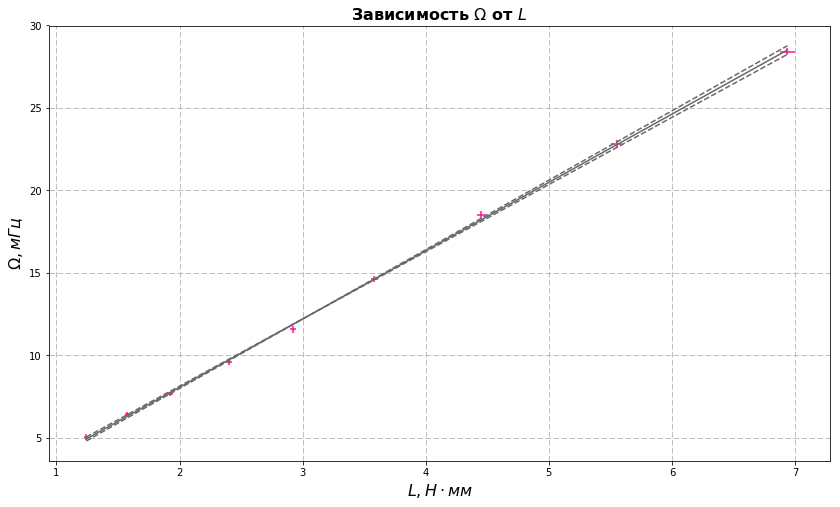

In [61]:
a, b = np.polyfit(tor, prec, deg=1)
a_1, b_1 = np.polyfit(tor, prec - prec_err * np.linspace(1, -1, len(prec_err)), deg=1)
a_2, b_2 = np.polyfit(tor, prec + prec_err * np.linspace(1, -1, len(prec_err)), deg=1)

plt.figure(figsize=(14, 8))
plt.grid(linestyle='--')
plt.title('Зависимость $\Omega$ от $L$', fontweight='bold', fontsize=16)
plt.xlabel('$L, Н \cdot мм$', fontsize=16)
plt.ylabel('$\Omega, мГц$', fontsize=16)
plt.plot(tor, b + tor * a, color='dimgrey')
plt.plot(tor, b_1 + tor * a_1, color='dimgrey', ls='--')
plt.plot(tor, b_2 + tor * a_2, color='dimgrey', ls='--')
plt.scatter(tor, prec, color='darkslategrey', s=0.4)
plt.errorbar(tor, prec, xerr=tor_err, yerr=prec_err, ls ='none', color = 'deeppink')
plt.show()

$a = \frac{\Omega}{L}$

$\omega_0 = a I_0$

$\sigma_{\omega_0} = \sqrt{a^2 \err{I_0} + I^2_0 \err{a}}$

$\omega_0 = (6.2 \pm 0.5) \cdot 10^{-3} \; радиан/с$

In [62]:
def frequency(a, I):
    return a * I

def frequency_err(a, a_err, I, I_err):
    return np.sqrt(
        (a * I_err) ** 2 +
        (I * a_err) ** 2)

In [63]:
a_err = abs(a_1 - a_2) / np.sqrt(len(tor))
freq = frequency(a, I_r)
freq_err = frequency_err(a, a_err, I_r, I_r_err)
print("omega_0 = {:.2} \pm {:.1}".format(freq, freq_err))

omega_0 = 6.2 \pm 0.5
